## Accenture Data Analytics and Visualization job Simulation Project

**Load required libraries and datasets**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')

In [3]:
content.info(), reactions.info(),reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (

(None, None, None)

**Data cleaning for the three datasets one by one**

In [4]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
#Drop these columns cause we only need data related to reactions and content
content.drop(columns=['Unnamed: 0', 'URL', 'User ID'], inplace=True)

In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [7]:
content.rename(columns={'Type': 'content_type'}, inplace= True)

In [8]:
content['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [9]:
# eliminate ""
content['Category']=content['Category'].str.replace('"', '')

In [10]:
# science and Science are the same. So do animals and Animals and... Let's combine these together.
content['Category']=content['Category'].str.lower()

In [11]:
content['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [12]:
content['content_type'].value_counts()

content_type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [13]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [14]:
reactions.drop(['Unnamed: 0', 'User ID'], axis=1, inplace=True)

In [15]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


In [16]:
reactions.rename(columns={'Type': 'reaction_type'}, inplace= True)

In [17]:
reactions['reaction_type'].value_counts()

reaction_type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [18]:
reactions['Datetime']= pd.to_datetime(reactions['Datetime'])

In [19]:
reactions.dropna(inplace=True)

In [20]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   reaction_type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [21]:
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [22]:
reaction_types.drop(columns=['Unnamed: 0'], inplace= True)
reaction_types= reaction_types.rename({'Type':'reaction_type'},axis=1)

In [23]:
reaction_types['reaction_type'].value_counts()

reaction_type
heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: count, dtype: int64

In [24]:
reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reaction_type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


**Merge datasets**

In [25]:
results = content.merge(reactions, on='Content ID').merge(reaction_types, on='reaction_type')
display(results.head())
display(results.shape)

,Content ID,content_type,Category,reaction_type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0


(24573, 7)

In [26]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   content_type   24573 non-null  object        
 2   Category       24573 non-null  object        
 3   reaction_type  24573 non-null  object        
 4   Datetime       24573 non-null  datetime64[ns]
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


In [27]:
content['Content ID'].duplicated().sum(),reactions['Content ID'].duplicated().sum()

(0, 23611)

In [28]:
reaction_types['reaction_type'].duplicated().sum(),reactions['reaction_type'].duplicated().sum()

(0, 24557)

**As the number of rows in results is the same as that of reactions, we can be sure that no duplicates were created and no rows were unmatched**

In [29]:
results.to_excel('results.xlsx')

In [30]:
aggregate = results.groupby('Category')['Score'].sum().sort_values(ascending=False)

In [31]:
top5 = aggregate[:5]

In [32]:
top5

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

In [33]:
with pd.ExcelWriter('top5category.xlsx') as writer:
    results.to_excel(writer, sheet_name='Cleaned Table')
    aggregate.to_excel(writer, sheet_name='Aggregate Score')
    top5.to_excel(writer, sheet_name='Top 5 Categories')

## Make visualizations

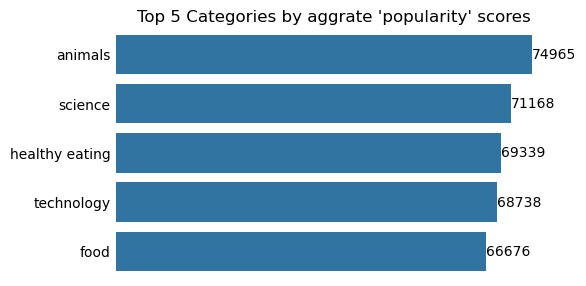

In [34]:
plt.figure(figsize=(6, 3))
sns.barplot(y=top5.index, x=top5.values);# 注意这里不能用countplot因为数据已经汇总好了
for i, value in enumerate(top5.values):
    plt.text(value, i, f'{value}', va='center', ha='left', fontsize=10, color='black')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0)
plt.tick_params(axis='x', labelbottom=False) 
plt.title("Top 5 Categories by aggrate 'popularity' scores")
plt.savefig("Top 5 Categories by aggrate 'popularity' scores");

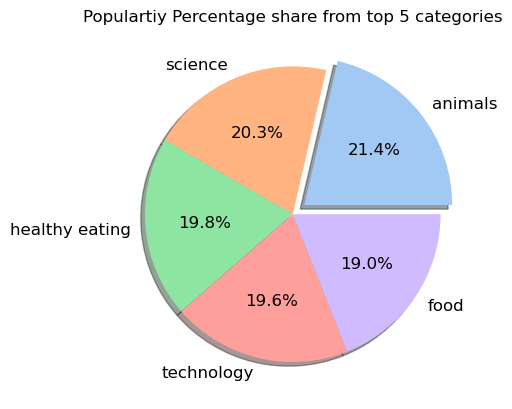

In [35]:
colors = sns.color_palette('pastel')[:len(top5)]
highlight_index = 0
explode = [0.1 if i == highlight_index else 0 for i in range(len(top5))]
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow =True, textprops={'fontsize': 12})

# Title and layout
plt.title('Populartiy Percentage share from top 5 categories')
plt.savefig('Populartiy Percentage share from top 5 categories');

In [36]:
top5_popular=results[results['Category'].isin(top5.index)]
category_mapping = {
    'adore': 'positive','cherish': 'positive', 'disgust': 'negative','dislike': 'negative','hate':'negative','heart': 'neutral',
    'indifferent': 'neutral','interested': 'positive','intrigued': 'positive', 'like':'positive',
    'love':'positive', 'peeking':'neutral','scared':'negative','super love':'positive','want':'positive','worried':'negative'
}
#mostPopularCategory=mostPopularCategory.to_frame(name='count').reset_index()
top5_popular.loc[:,'mapped_reaction_type']=top5_popular['reaction_type'].map(category_mapping)

/var/folders/sk/tkm8wbdn5d717x9h1k6b_3yc0000gn/T/ipykernel_93039/2125046929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_popular.loc[:,'mapped_reaction_type']=top5_popular['reaction_type'].map(category_mapping)


In [37]:
top5_popular=top5_popular.groupby(['Category', 'mapped_reaction_type']).size().unstack()
top5_popular = top5_popular.loc[top5_popular.sum(axis=1).sort_values().index]
top5_popular

mapped_reaction_type,negative,neutral,positive
Category,,,
technology,510,328,860
food,544,319,836
healthy eating,520,326,871
science,547,349,900
animals,618,349,930


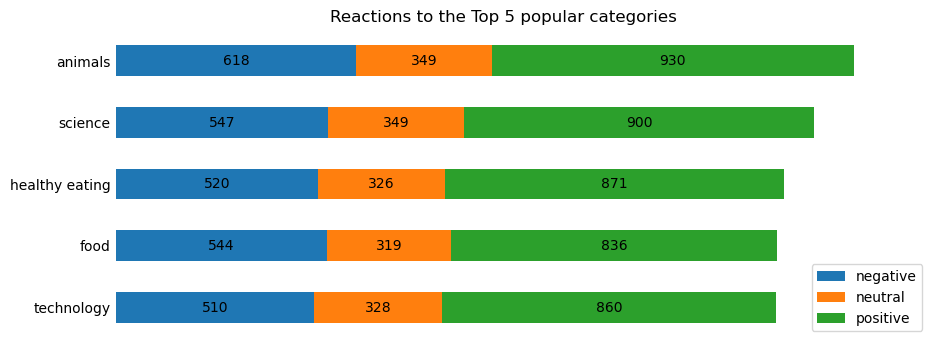

In [38]:
ax = top5_popular.plot(kind='barh', stacked=True, figsize=(10,4))

# Add percentages of the summed total sales as labels 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{label:.0f}' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
   
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='lower right', bbox_to_anchor=(1.05, 0.0))
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.tick_params(axis='both', length=0)
plt.tick_params(axis='x', labelbottom=False)
ax.set_title('Reactions to the Top 5 popular categories')
plt.show()

In [39]:
results['Datetime'].dt.strftime('%Y-%m').value_counts().sort_index()

Datetime
2020-06     892
2020-07    2070
2020-08    2114
2020-09    2022
2020-10    2056
2020-11    2034
2020-12    2092
2021-01    2126
2021-02    1914
2021-03    2012
2021-04    1974
2021-05    2138
2021-06    1129
Name: count, dtype: int64

In [40]:
#type(results['Datetime'].str.slice(5,7))

In [41]:
post_by_month=results.groupby(results['Datetime'].dt.strftime('%Y-%m'))['Content ID'].nunique()
post_by_month

Datetime
2020-06    536
2020-07    778
2020-08    773
2020-09    754
2020-10    771
2020-11    768
2020-12    756
2021-01    781
2021-02    755
2021-03    753
2021-04    736
2021-05    759
2021-06    610
Name: Content ID, dtype: int64

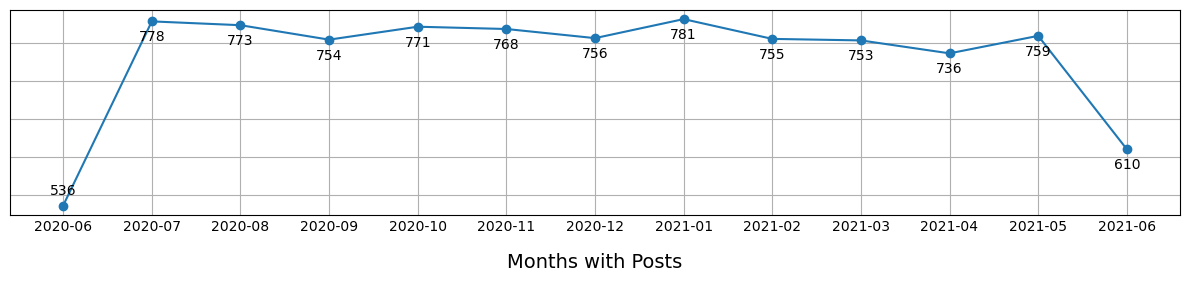

In [42]:
plt.figure(figsize=(12, 3))
ax = plt.plot(post_by_month.index, post_by_month.values, marker='o')

for i, value in enumerate(post_by_month.values):
    if i==0:
        plt.text(post_by_month.index[i], value+10, f'{value:.0f}', ha='center', va='bottom', fontsize=10, color='black')  
    else:
        plt.text(post_by_month.index[i], value-30, f'{value:.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='both', length=0)
plt.tick_params(axis='y', labelleft=False) 
plt.grid()
plt.title('Months with Posts', y=-0.3, fontsize=14)
plt.tight_layout() 
plt.savefig('Months with Posts')
plt.show()